In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

import kmeans_utils as kutil

In [2]:
DATA_DIR = '../../datasets/NNN/unit_data_full.pkl'
# DATA_DIR = '../../datasets/NNN/face_roi_data.pkl'

dat = pd.read_pickle(DATA_DIR)

dat = dat[dat['roi'].astype(str).str.contains('B')]

========================= MB1_3_B 1249 =========================


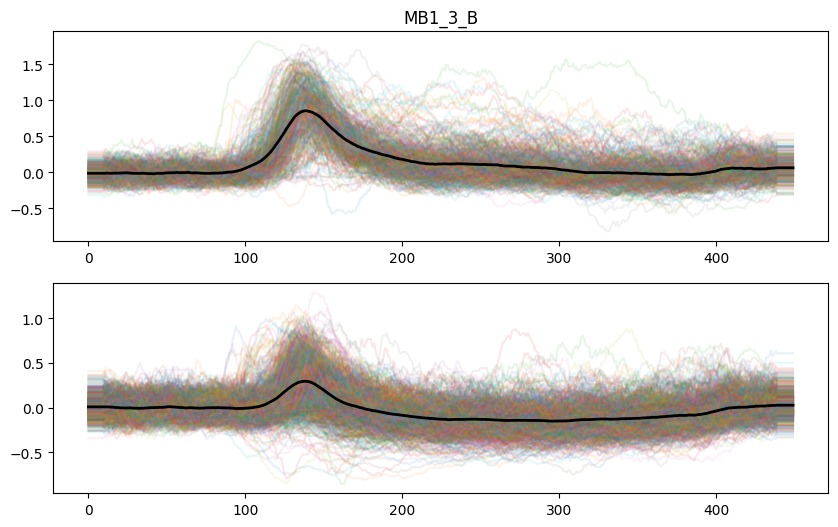

0 (72, 450) 404
1 (72, 450) 845


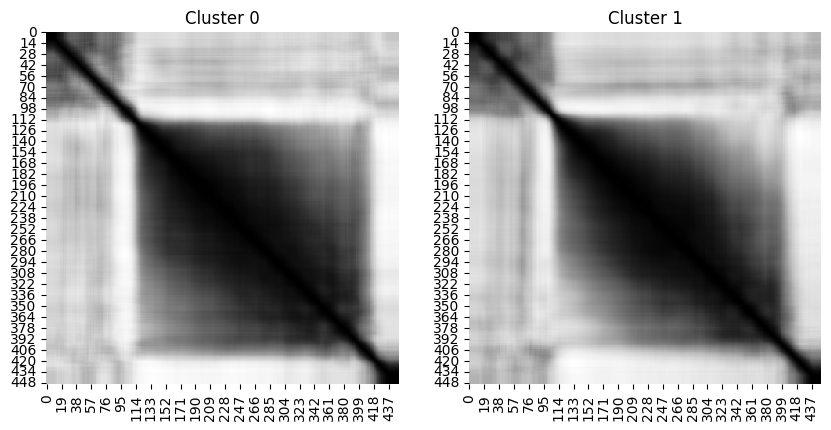

========================= MB2_20_B 1217 =========================


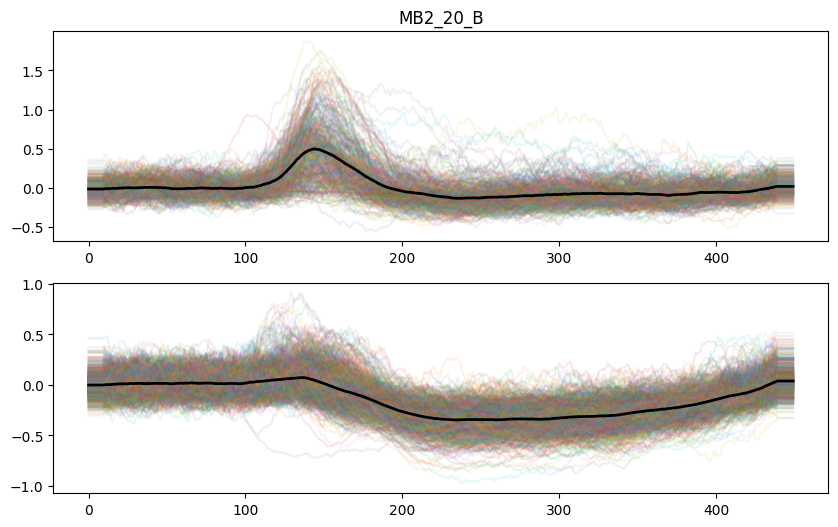

0 (72, 450) 376
1 (72, 450) 841


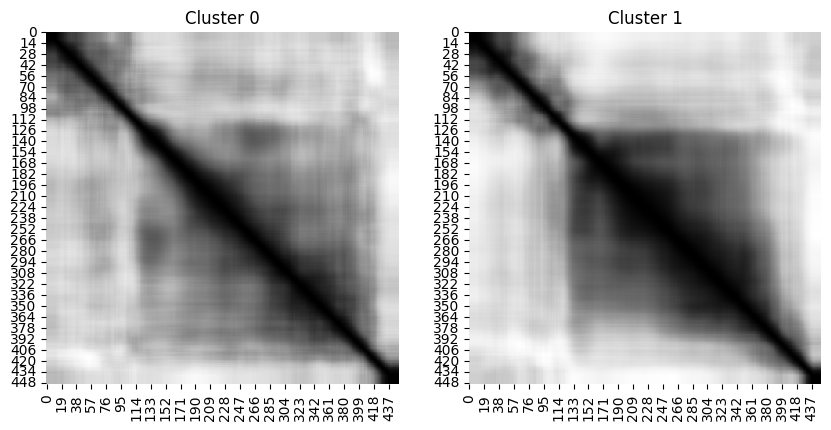

========================= Unknown_20_B 223 =========================


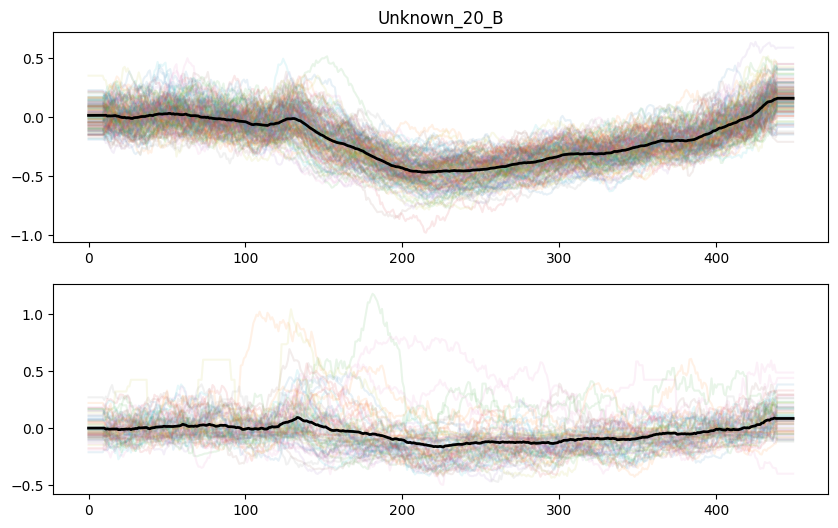

0 (72, 450) 155
1 (72, 450) 68


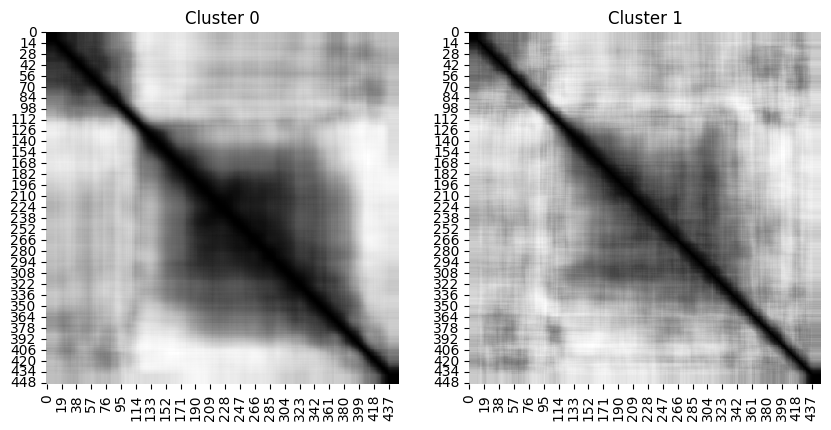

========================= Unknown_6_B 495 =========================


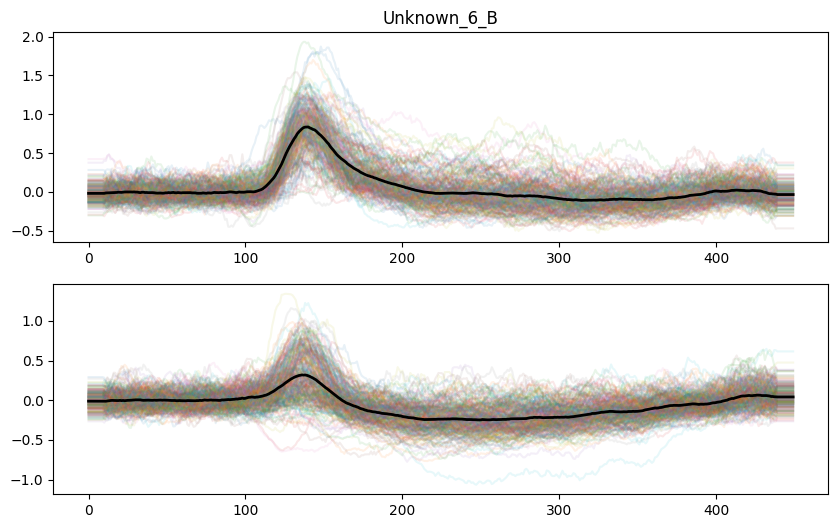

0 (72, 450) 232
1 (72, 450) 263


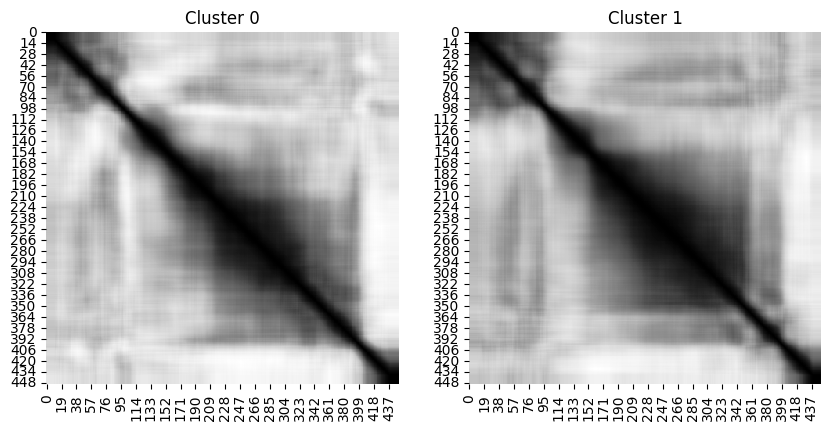

========================= MB2_21_B 177 =========================


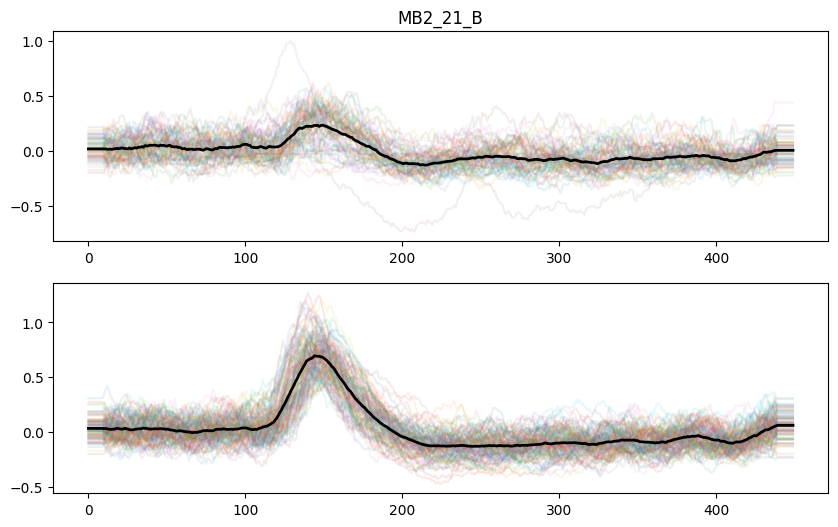

0 (72, 450) 70
1 (72, 450) 107


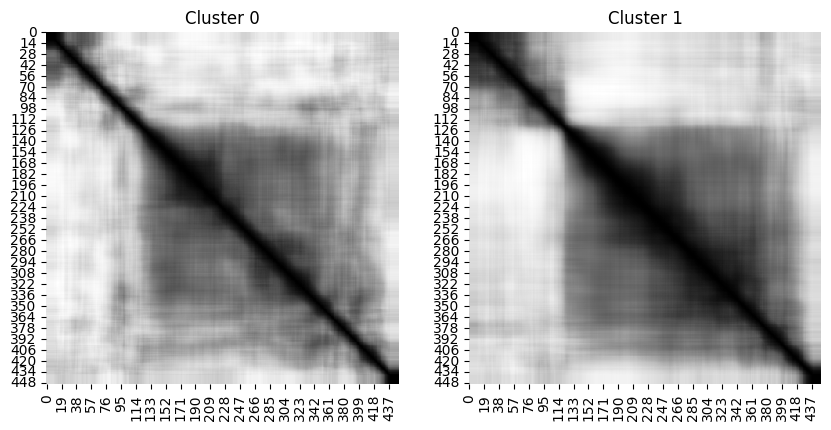

========================= Unknown_9_B 361 =========================


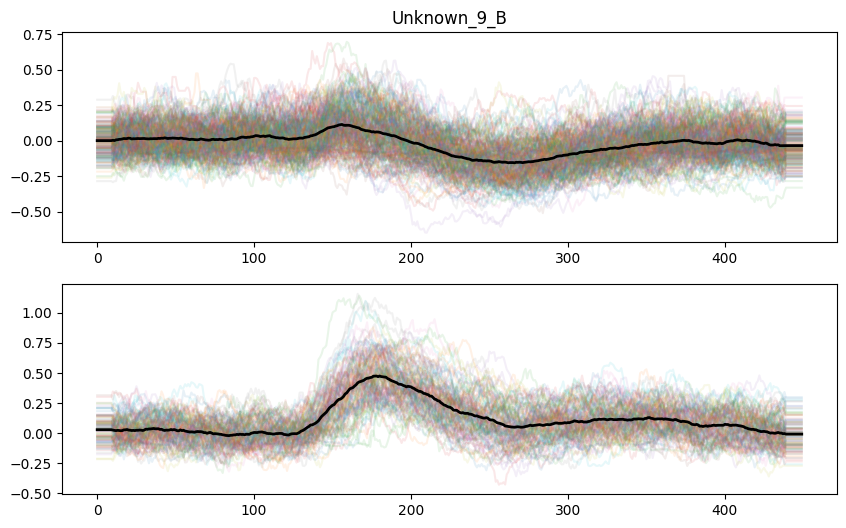

0 (72, 450) 243
1 (72, 450) 118


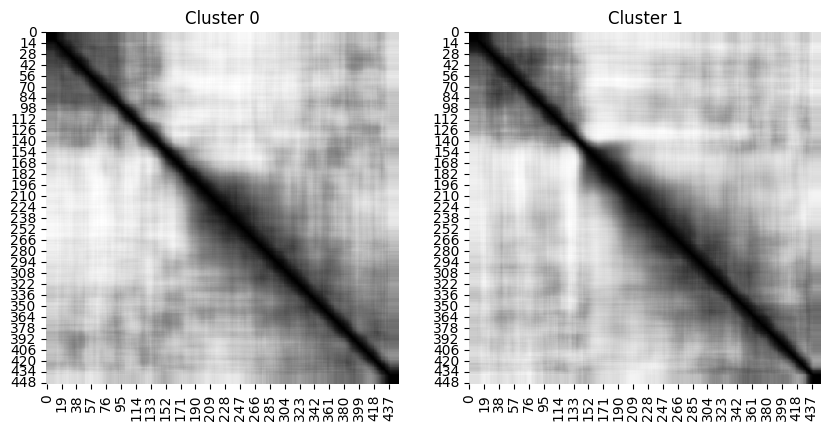

========================= Unknown_23_B 78 =========================


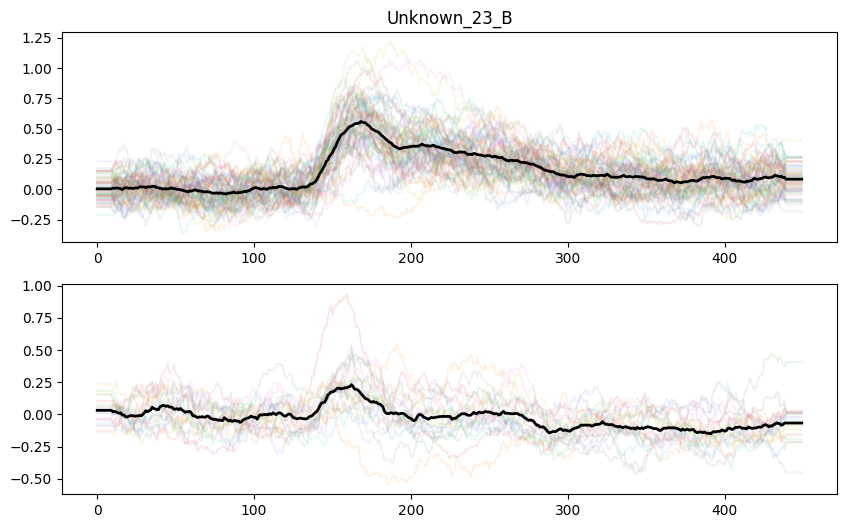

0 (72, 450) 59
1 (72, 450) 19


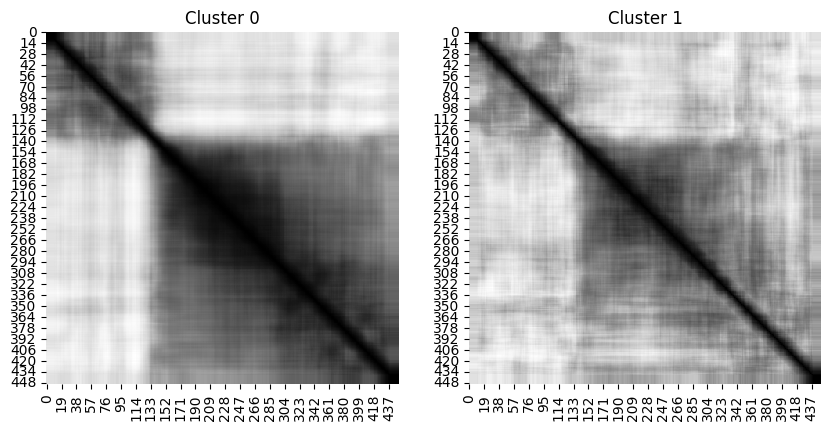

========================= MB1_8_B 126 =========================


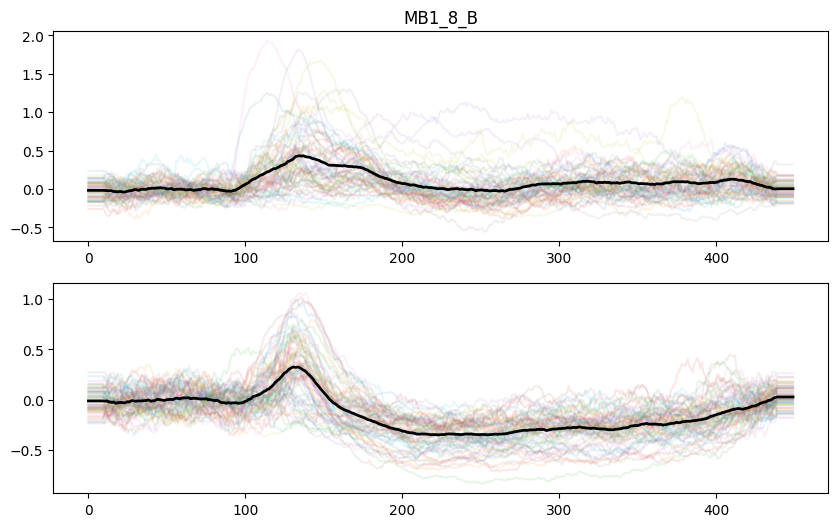

0 (72, 450) 59
1 (72, 450) 67


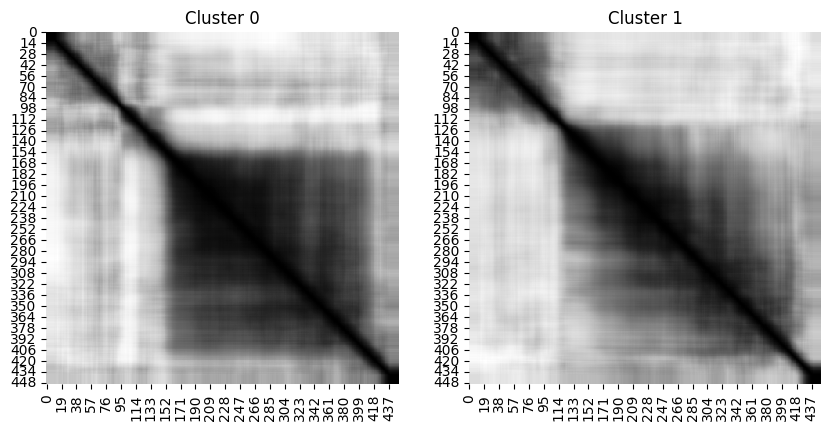

========================= AB3_18_B 222 =========================


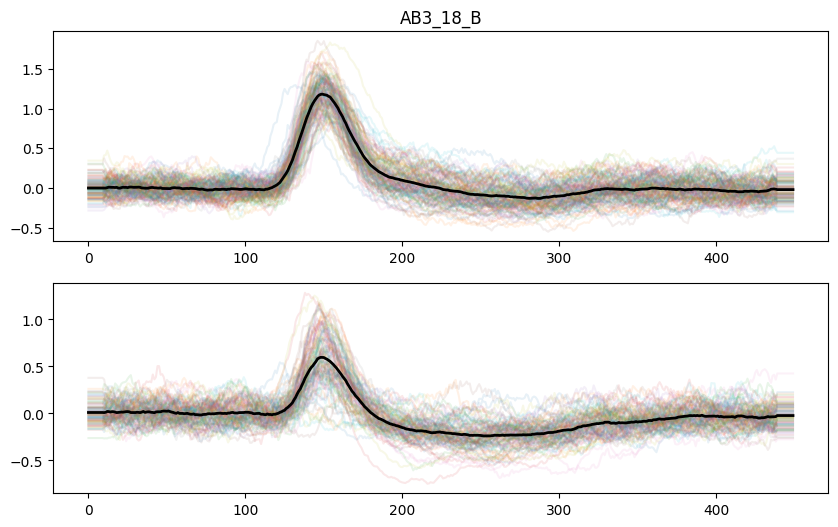

0 (72, 450) 122
1 (72, 450) 100


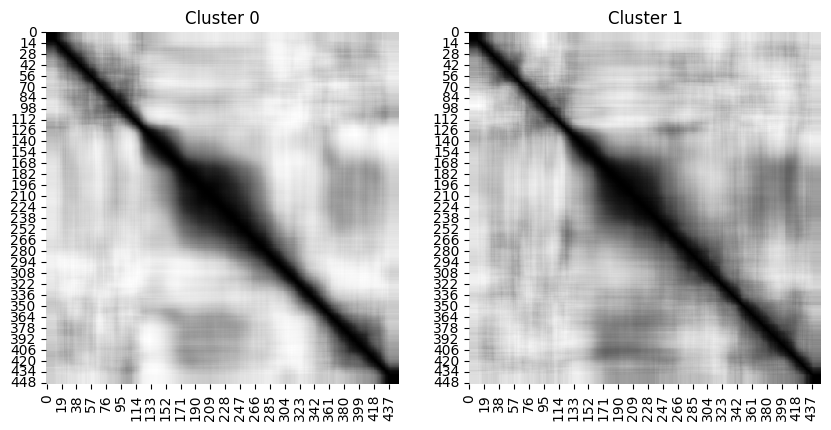

========================= MB3_12_B 1315 =========================


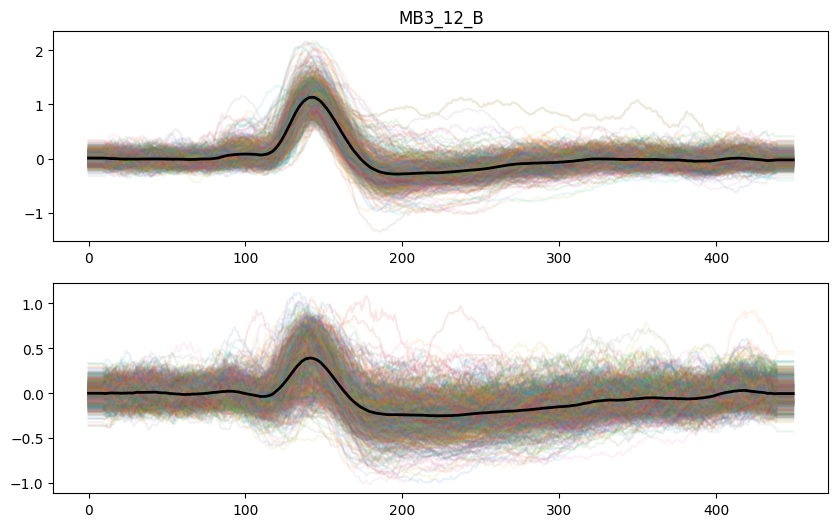

0 (72, 450) 578
1 (72, 450) 737


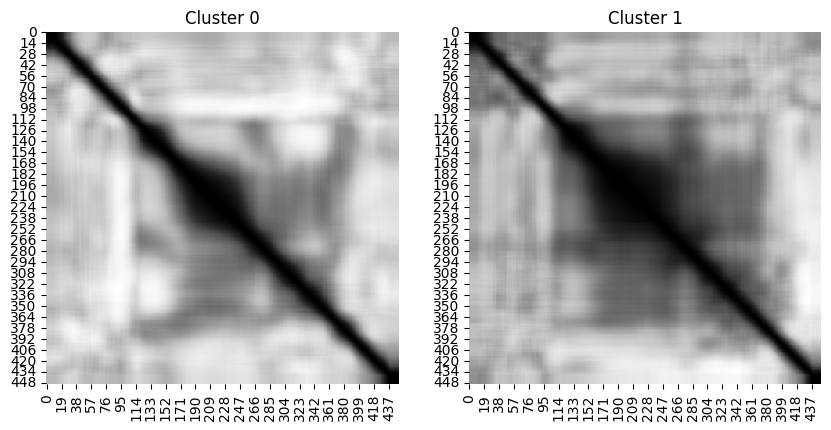

========================= AB3_12_B 543 =========================


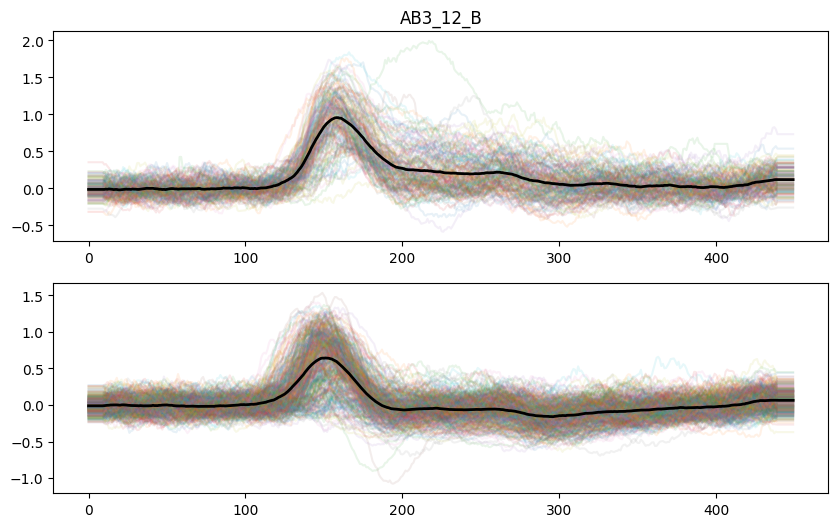

0 (72, 450) 158
1 (72, 450) 385


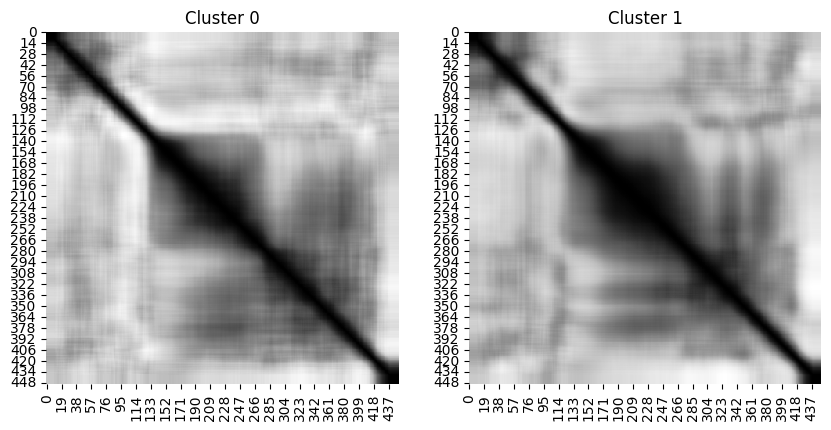

========================= AB3_17_B 507 =========================


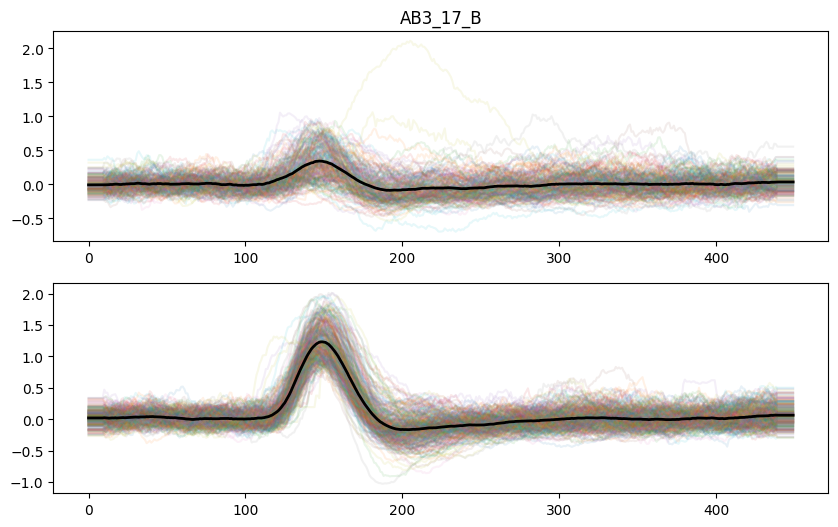

0 (72, 450) 197
1 (72, 450) 310


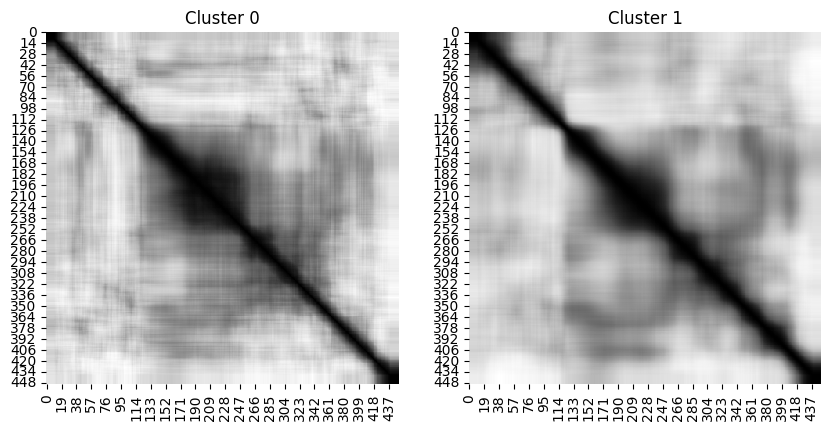

========================= Unknown_27_B 564 =========================


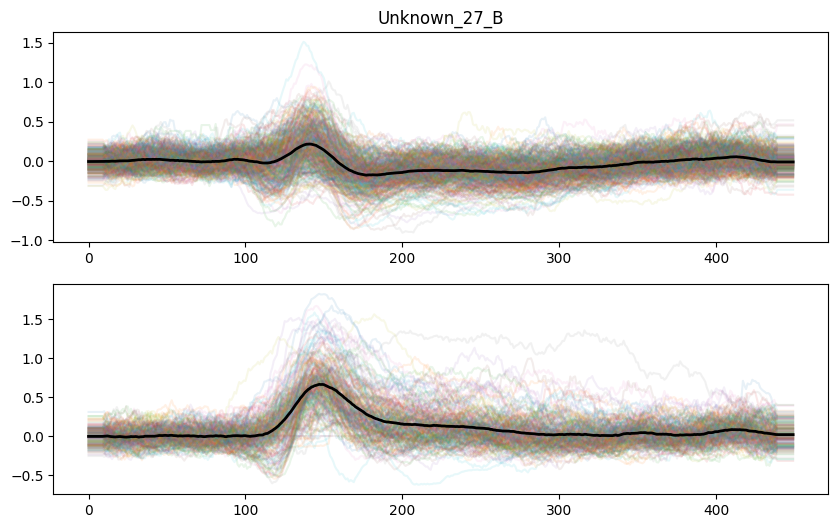

0 (72, 450) 360
1 (72, 450) 204


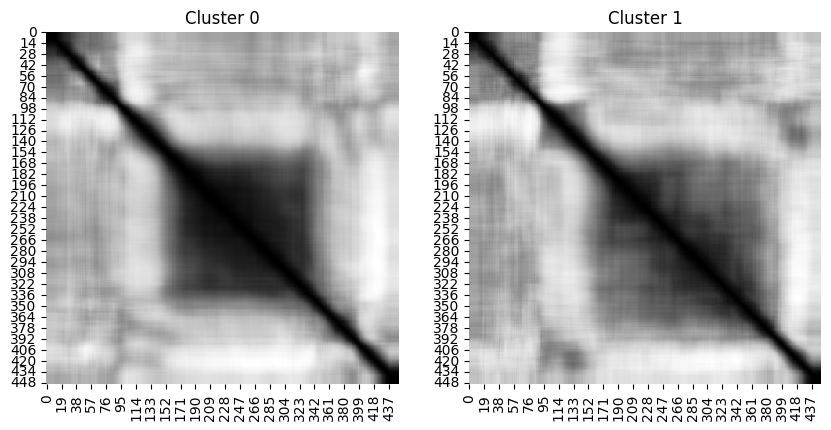

In [4]:
# Filter to valid rows (with some PSTH) and add convenience columns
dat_valid = dat.copy()
rois = dat_valid['roi'].unique()
rdm_metric = 'correlation'

for roi_name in rois:
    dat_roi = dat_valid.loc[dat_valid['roi'] == roi_name]
    print('=========================', roi_name, len(dat_roi), '=========================')
    
    # X_img, global_img_indices, count = kutil.compute_image_time_trace(dat_roi, img_start=1000, img_end=1072)

    # cluster units in the ROI based on their time trace (averaged across a set of images)
    accum, _ = kutil.compute_unit_time_trace(dat_roi, img_start=1000, img_end=1072)
    labels, best_k, _, _ = kutil.choose_k_and_cluster(accum, k_range=range(2,11))
    unique_clusters = len(np.unique(labels))

    fig,axes = plt.subplots(unique_clusters,1, figsize=(10,6))
    for unit in range(len(accum)):
        cluster = labels[unit]
        ax = axes[cluster]
        trace = accum[unit, :]
        sns.lineplot(trace, alpha=0.1, ax=ax)
    for c in range(unique_clusters):
        mean_trace = accum[labels == c].mean(axis=0)
        sns.lineplot(x=range(accum.shape[1]), y=mean_trace, color="black", linewidth=2, ax=axes[c])
        
    axes[0].set_title(roi_name)
    plt.show()

    fig, axes = plt.subplots(1, unique_clusters, figsize=(10,6))
    for cluster_id in np.unique(labels):
        ax = axes[cluster_id]
        unit_id = labels==cluster_id

        # compute the average time trace for all units in a single cluster
        # X_img should be (images, time_points), for a certain subset of images
        X_img, global_img_indices, count = kutil.compute_image_time_trace(dat_roi, img_start=1000, img_end=1072, units=unit_id)
        print(cluster_id, X_img.shape, count)

        rdm = squareform(pdist(X_img.T, metric=rdm_metric))
        sns.heatmap(rdm, cmap=sns.color_palette('Greys_r', as_cmap=True), 
                    square = True, cbar = False, ax=ax)
        ax.set_title(f'Cluster {cluster_id}')
    plt.show()




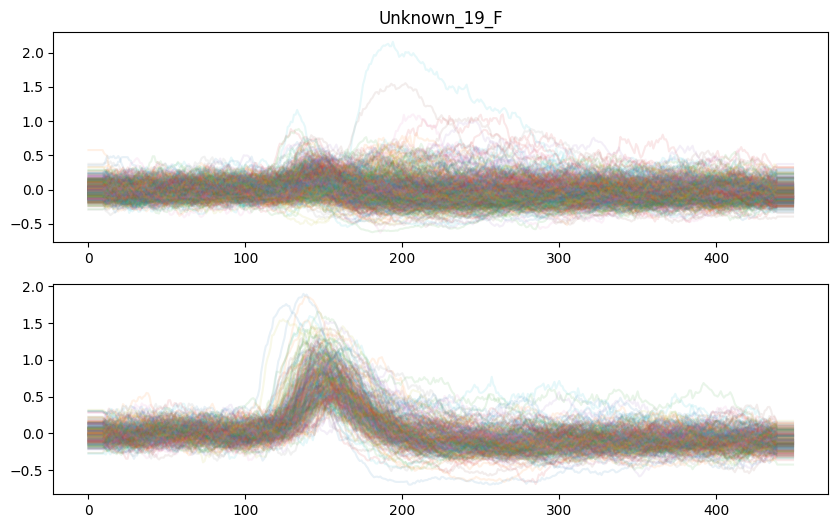

In [14]:
fig,axes = plt.subplots(len(np.unique(labels)),1, figsize=(10,6))

for unit in range(len(accum)):
    cluster = labels[unit]
    ax = axes[cluster]
    trace = accum[unit, :]
    sns.lineplot(trace, alpha=0.1, ax=ax)
axes[0].set_title(roi_name)
plt.show()